### Written by  [Gabriel Borges Pinheiro](https://www.github.com/gabrielbopi)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def db(X):
    return 10 * np.log10(np.abs(X))
def inv_db(X):
    return 10**(X/10)
def dbm(X):
    return 10 * np.log10(np.abs(X)/(1e-3))
def inv_dbm(X):
    return (1e-3) * 10**(X/10)

def NminInd(list_orig, N):
    """Find N minimum elements"""
    list1 = np.copy(list_orig)
    final_list =[];
  
    for i in range(0, N):   
        minInd = np.argmin(list1)
        final_list.append(minInd)
        list1[minInd] = 99999
        
    return final_list

In [3]:
def bases(D, x, y, z_med=15):
    num_x = int(x/D)
    num_y = int(y/D)
    total = num_x*num_y
    n = np.array([])
    for i in range(num_y):
        for j in range(num_x):
            n = np.append(n, np.array([(j*D)+(D/2),(i*D)+(D/2),z_med])) 
        
    return n.reshape(total,3) , total

def usuário(n, x, y):
    z_med = 1.5 #m
    UE = np.array([])
    for i in range(n):
        UE = np.append(UE,np.array([x*np.random.random(),y*np.random.random(),z_med]))
    return UE.reshape(n,3)

- Channel format:
$H(f)=\beta e^{j \phi-j2\pi f \tau}$

In [4]:
def pathloss(R,f):
    """
    Returns the 
    """
    #Carrier frequency
#     f0 = 60e9 #Hz
    #Wavelength
    λ = 3e8/f
    #Linear pathloss
    L_lin =  (λ/(4*np.pi*R))**2
    return L_lin

def rand_channel(D, f=120e3):
    """
    Returns the channel
    """
    c = 3e8 #m/s
    τ = D/c
    L = pathloss(D, f)
    β = np.sqrt(L)# * (np.random.normal(0,np.sqrt(1/2))+1j*np.random.normal(0,np.sqrt(1/2)))

    H = β*np.exp(1j*(-2*np.pi*f*τ))
    return H

#### Calculating parameters

In [5]:
def bases(D, x, y, z_med=15):
    num_x = int(x/D)
    num_y = int(y/D)
    total = num_x*num_y
    n = np.array([])
    for i in range(num_y):
        for j in range(num_x):
#             n = np.append(n, np.array([(j*D)+(D/2),(i*D)+(D/2),z_med]))
            n = np.append(n, np.array([(j*D),(i*D),z_med])) 
    return n.reshape(total,3) , total

In [35]:
#Espaçamento entre cada BS
# gap_bs = 50 #m
gap_bs = 10 #[m] Espaçamento entre cada BS 
#Lados da area de bases (quadrado com bases a cada gap_bs metros)
# BS,n_bs = bases(gap_bs, 100, 100,3)
BS,n_bs = bases(gap_bs, 40, 20,3)
n_ue = 3
#Dropa usuario aleatorio na area dos lados especificados
# UE = usuário(n_ue, 100, 100)
UE = usuário(n_ue, 30, 10)
#Carrier frequency
f0 = 5.8e9 #Hz
#User band
Δf = 120e3 #Hz
#Spectral density of noise
N0=-127#dBm

#Numero de frequencias
n_f = 128
f = f0 + Δf*(np.arange(n_f)-n_f/2)
H = np.zeros([n_bs,n_f],dtype='complex')
R = np.zeros([n_bs,3])
φ = np.array([])
for i in range(n_bs):
    R[i] = UE[0]-BS[i]
    for j in range(n_f):
        D = np.linalg.norm(R[i])
        H[i,j] = rand_channel(D,f[j])
        
    φ = np.append(φ,2*np.pi*(np.random.rand()-0.5))
    H[i] = H[i]*np.exp(1j*φ[i])

In [49]:
#Numero de frequencias
n_f = 600
f = f0 + Δf*(np.arange(n_f)-n_f/2)
H = np.zeros([n_ue,n_bs,n_f],dtype='complex')
R = np.zeros([3])
φ = np.zeros([n_ue,n_bs],dtype='float')
for k in range(n_ue):
    for i in range(n_bs):
        R = UE[k]-BS[i]
        for j in range(n_f):
            D = np.linalg.norm(R)
            H[k,i,j] = rand_channel(D,f[j])

        φ[k][i] = 2*np.pi*(np.random.rand()-0.5)
        H[k][i] = H[k][i]*np.exp(1j*φ[k][i])

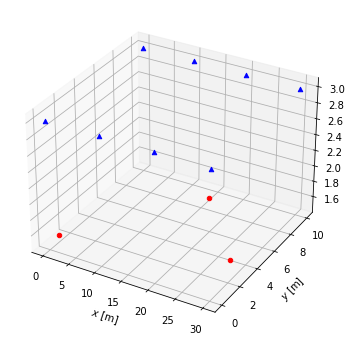

In [50]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
plt.ylabel("$y$ [m]")
plt.xlabel("$x$ [m]")
# plt.zlabel("$z$ [m]")

for i in range(n_bs):
    ax.scatter(BS[i][0], BS[i][1], BS[i][2], marker='^',color='blue')
for n in range(n_ue):
    ax.scatter(UE[n][0], UE[n][1], UE[n][2], marker='o',color='red')

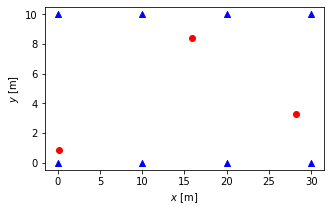

In [51]:
fig2 = plt.figure(figsize=(5,3))
ax2 = fig2.add_subplot(111, projection='rectilinear')
plt.ylabel("$y$ [m]")
plt.xlabel("$x$ [m]")
# plt.zlabel("$z$ [m]")
for i in range(n_bs):
    ax2.scatter(BS[i][0], BS[i][1], marker='^',color='blue')
for n in range(n_ue):
    ax2.scatter(UE[n][0], UE[n][1], marker='o',color='red')

In [52]:
BS

array([[ 0.,  0.,  3.],
       [10.,  0.,  3.],
       [20.,  0.,  3.],
       [30.,  0.,  3.],
       [ 0., 10.,  3.],
       [10., 10.,  3.],
       [20., 10.,  3.],
       [30., 10.,  3.]])

Signal matrix $s(t)$:

In [53]:
P = inv_dbm(30)/n_f
# S(f) generated as a digital randomic diagonal matrix (with 1 or -1)
D = np.random.randint(low=0,high=2,size=n_f)*2-1
S = np.zeros([n_ue,n_f,n_f])
S[::] = np.diag(D)*np.sqrt(P)
#Noise
var_ruido = inv_dbm(-127)*Δf/2
# var_ruido = inv_dbm(-105)*Δf/2 
η = np.random.normal(0,np.sqrt(var_ruido))+1j*np.random.normal(0,np.sqrt(var_ruido))

# np.random.normal(0,np.sqrt(var_ruido))
# Received signal Y(f)
Y = H @ S + η

S_inv = np.linalg.inv(S)
R =  Y@S_inv

for j in range(n_ue):
    for i in range(n_bs):
        R[j][i] = R[j][i]*np.exp(-1j*φ[j][i])

# Vector of delays
h = np.fft.ifft(R)

#Sample rate
fs = n_f*Δf
Ts = 1/fs
t = np.linspace(0,n_f-1,n_f)*Ts

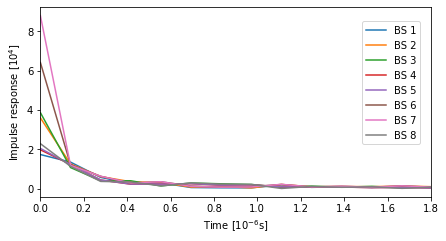

In [54]:
plt.figure(figsize=(7,3.5))

# for i in range(3):
for i in range(n_bs):
    label = ('BS {}'.format(i+1))
    plt.plot(t*1e6,np.abs(h[0][i])*1e4,label=label)

plt.ylabel("Impulse response [$10^4$]")
plt.xlabel("Time [$10^{-6}$s]")
plt.xlim(0,1.8)
plt.legend(bbox_to_anchor=(0.81, 0.95), loc='upper left')
# plt.grid()

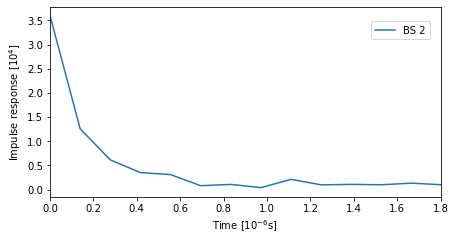

In [55]:
plt.figure(figsize=(7,3.5))

for i in [1]:
# for i in range(n_bs):
    label = ('BS {}'.format(i+1))
    plt.plot(t*1e6,np.abs(h[0][i])*1e4,label=label)

plt.ylabel("Impulse response [$10^4$]")
plt.xlabel("Time [$10^{-6}$s]")
plt.xlim(0,1.8)
plt.legend(bbox_to_anchor=(0.81, 0.95), loc='upper left')
# plt.grid()

In [13]:
c = 3e8 #m/s
τ_est = np.zeros([n_ue,n_bs])
D_est = np.zeros_like(τ_est)

for j in range(n_ue):
    i_τ = np.apply_along_axis(lambda i:np.argmax(np.abs(i)), 1, h[j])
    τ_est[j]=np.apply_along_axis(lambda k:t[k], 0, i_τ)
    D_est[j] = τ_est[j]*c

#True values:
D = np.zeros_like(D_est)
for j in range(n_ue):
    for i in range(n_bs):
        D[j][i]=np.linalg.norm(BS[i]-UE[j])
    τ = D/c

#Erro de distancia (metros)
erro_D = np.abs(D-D_est)

In [14]:
import pandas as pd

In [15]:
data = np.array([range(1,n_bs+1),τ_est[0]*(1e7), D_est[0], D[0], erro_D[0]]).transpose()
dados = pd.DataFrame(columns=['BS','$\tau$ estimated ($10^{-7}$ s)','D estimated (m)','D real (m)','Error distance (m)'],data=data)
dados = dados.set_index('BS')
dados.head(n_bs)

,$\tau$ estimated ($10^{-7}$ s),D estimated (m),D real (m),Error distance (m)
BS,,,,
1.0,0.651042,19.531250,14.742262,4.788988
2.0,0.325521,9.765625,5.012379,4.753246
3.0,0.325521,9.765625,5.737037,4.028588
4.0,0.651042,19.531250,15.514614,4.016636
5.0,0.651042,19.531250,17.085124,2.446126
6.0,0.325521,9.765625,9.984543,0.218918
7.0,0.325521,9.765625,10.367292,0.601667
8.0,0.651042,19.531250,17.755855,1.775395


#### Trilateration
#### LLS
$\mathbf{A} \mathbf{r}_{est} = \mathbf{c}$

In [16]:
def trilat_lls(D, BS, N_bs=3):
    import math
    
    r_est = np.zeros([n_ue,2])
    for j in range(n_ue):
    # for j in range(N_bs):
    #New denotations
        lista = NminInd(D[j,:], N_bs)
        d = D[j,lista]
        x = BS[lista,0]
        y = BS[lista,1]

        A = np.array([])
        c = np.array([])
        for i in np.arange(N_bs-1):
            for k in np.arange(i+1,N_bs):
                A = np.append(A,[2*(x[i]-x[k]),2*(y[i]-y[k])])
                c = np.append(c,(d[k]**2-d[i]**2)+(-x[k]**2-y[k]**2+x[i]**2+y[i]**2))
        A = A.reshape(math.comb(N_bs,2),2)
        r_est[j] = np.linalg.pinv(A)@c
    return r_est

def trilat_nls(D, BS, r_0, N_bs=3, n_it=15):
    θ = r_0
    theta = np.zeros([n_ue,2])
    for a in range(n_it):
        for j in range(n_ue):
        #New denotations
            lista = NminInd(D[j,:], N_bs)
            r = D[j,lista]
            x = BS[lista,0]
            y = BS[lista,1]
            r_bs = np.array([x,y]).transpose()

            H = np.array([])
            f_θ = np.array([])
            for i in np.arange(N_bs):
                H = np.append(H,(r_bs[i]-θ[j])*1/np.linalg.norm(r_bs[i]-θ[j]))
                f_θ = np.append(f_θ,np.linalg.norm(r_bs[i]-θ[j]))
            H = H.reshape(N_bs,2)
            theta[j] = θ[j] - np.linalg.pinv(H)@(r-f_θ)
        θ = theta
    return theta

Distance error for:
UE0->3.7486460614038353m
UE1->1.7791927000729444m
UE2->6.975049905670212m


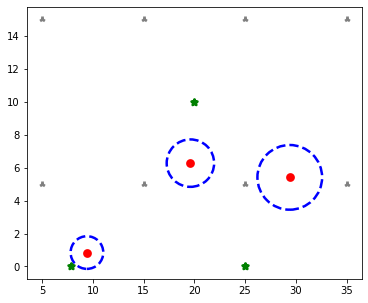

In [17]:
#PLOT    
r_est = trilat_lls(D_est, BS, 3)
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

erro_range = np.zeros(n_ue)
print('Distance error for:')
for n in range(n_ue):
    erro_range[n] = np.linalg.norm(UE[n,:2]-r_est[n])
    ax.scatter(UE[n][0], UE[n][1], marker='o',color='red', linewidths=2.75)
    ax.scatter(UE[n][0], UE[n][1], s=erro_range[n]*600, marker='o',edgecolor='blue',facecolor='none',linestyle='--', linewidths=2.5)
    ax.scatter(r_est[n][0], r_est[n][1], marker='*',color='green', linewidths=2.75)
    print('UE{}->{}m'.format(n,erro_range[n]))
    
for n in range(n_bs):
    ax.scatter(BS[n][0], BS[n][1], marker='2',color='gray', linewidths=2.75)

#### NLS de $1^a$ ordem

Distance error for:
UE0->7.54547139707643m
UE1->4.572815366968571m
UE2->nanm


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_12672\2721187854.py:38: RuntimeWarning: invalid value encountered in true_divide
  H = np.append(H,(r_bs[i]-θ[j])*1/np.linalg.norm(r_bs[i]-θ[j]))


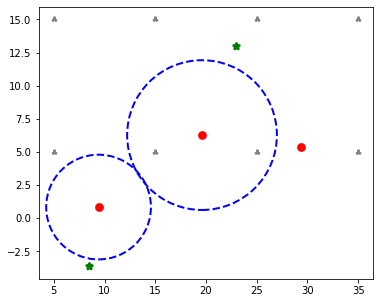

In [18]:
theta = trilat_nls(D_est, BS, r_est, N_bs=3, n_it=15)
#PLOT
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)

erro_range = np.zeros(n_ue)
print('Distance error for:')
for n in range(n_ue):
    erro_range[n] = np.linalg.norm(UE[n,:2]-theta[n])
    ax.scatter(UE[n][0], UE[n][1], marker='o',color='red', linewidths=2.75)
    ax.scatter(UE[n][0], UE[n][1], s=erro_range[n]**(20/14)*1250, marker='o',edgecolor='blue',facecolor='none',linestyle='--', linewidths=2)
    ax.scatter(theta[n][0], theta[n][1], marker='*',color='green', linewidths=2.75) 
    print('UE{}->{}m'.format(n,erro_range[n]))
for n in range(n_bs):
    ax.scatter(BS[n][0], BS[n][1], marker='2',color='gray', linewidths=2.75)

### Sweeps

In [19]:
def cdf(F,bins=20):
    hist, bins = np.histogram(F, bins)
    pdf = hist/np.sum(hist)
    cdf = np.cumsum(pdf)
    return cdf, pdf, bins

In [20]:
def erro_distancia(BS, UE,f):
    n_bs = np.size(BS,0)
    n_f = np.size(f,0)
    H = np.zeros([n_bs,n_f],dtype='complex')
    R = np.zeros([n_bs,3])
    φ = np.array([])
    
    for i in range(n_bs):
        R[i] = UE[0]-BS[i]
        for j in range(n_f):
            D = np.linalg.norm(R[i])
            H[i,j] = rand_channel(D, f[j])
        φ = np.append(φ,2*np.pi*(np.random.rand()-0.5))
        H[i] = H[i]*np.exp(1j*φ[i])

    P = inv_dbm(30)/n_f
    # S(f) generated as a digital randomic diagonal matrix (with 1 or -1)
    D = np.random.randint(low=0,high=2,size=n_f)*2-1
    S = np.diag(D)*np.sqrt(P)

    #Noise
    var_ruido = inv_dbm(-127)*Δf #N0=-127dBm
    η = np.random.normal(0,np.sqrt(var_ruido/2))+1j*np.random.normal(0,np.sqrt(var_ruido/2))

    # np.random.normal(0,np.sqrt(var_ruido))
    # Received signal Y(f)
    Y = H @ S + η

    S_inv = np.linalg.inv(S)
    R =  Y@S_inv
    
    #Eliminating channel phase effects
    for i in range(n_bs):
        R[i] = R[i]*np.exp(-1j*φ[i])

    # Vector of delays
    h = np.fft.ifft(R)

    #Sample rate
    fs = n_f*Δf
    Ts = 1/fs
    t = np.linspace(0,n_f-1,n_f)*Ts

    i_τ = np.apply_along_axis(lambda i:np.argmax(np.abs(i)), 1, h)
    τ_est=np.apply_along_axis(lambda k:t[k], 0, i_τ)
    c = 3e8 #m/s
    D_est = τ_est*c
    #True values:
    D = np.zeros_like(i_τ)
    for i in range(n_bs):
        D[i]=np.linalg.norm(BS[i]-UE[0])
    #Erro de distancia (metros)
    erro_D = np.abs(D-D_est)
    return erro_D

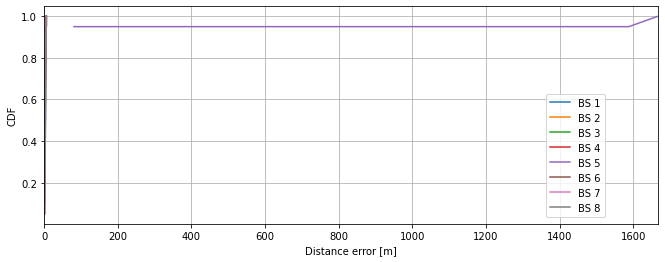

In [21]:
#Plot error CDF (m) for each BS
mc = 20 #Monte Carlo realizations
erro_D = np.zeros([mc,n_bs])
# erro_r = np.zeros([mc,n_ue])
for j in range(mc):
    np.random.seed(j)
    UE = usuário(n_ue, 200, 100)
    erro_D[j] = erro_distancia(BS, UE,f)
#     erro_r[j] = erro_trilat(BS, UE,f)
#Compute CDF
cdf_erro = []
pdf_erro = []
bins = []
for i in range(n_bs):
    cdf_erroi, pdf_erroi, binsi = cdf(erro_D[:,i],bins=21)
#     cdf_erroi, pdf_erroi, binsi = cdf(erro_r[:,i],bins=21)
    cdf_erro = np.concatenate([cdf_erro,cdf_erroi])
    pdf_erro = np.concatenate([pdf_erro,pdf_erroi])
    bins = np.concatenate([bins,binsi])
cdf_erro = cdf_erro.reshape([n_bs,np.size(cdf_erroi)])
pdf_erro = pdf_erro.reshape([n_bs,np.size(pdf_erroi)])
bins = bins.reshape([n_bs,np.size(binsi)])

plt.figure(figsize=(11,4))
for i in range(n_bs):
    label = ('BS {}'.format(i+1))
    plt.plot(bins[i,1:],cdf_erro[i], label=label)
plt.ylabel("CDF")
plt.xlabel("Distance error [m]")
plt.xlim(0,np.max(bins))
plt.legend(bbox_to_anchor=(0.81, 0.62), loc='upper left')
plt.grid()

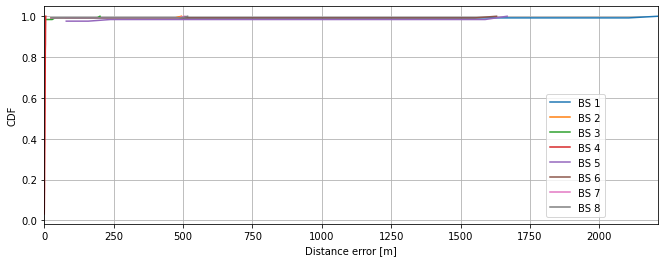

In [22]:
#Plot error CDF (m) for each BS
mc = 125 #Monte Carlo realizations
erro_D = np.zeros([mc,n_bs])
for j in range(mc):
    np.random.seed(j)
    UE = usuário(n_ue, 200, 100)
    erro_D[j] = erro_distancia(BS, UE,f)
#Compute CDF
cdf_erro = []
pdf_erro = []
bins = []
for i in range(n_bs):
    cdf_erroi, pdf_erroi, binsi = cdf(erro_D[:,i],bins=21)
    cdf_erro = np.concatenate([cdf_erro,cdf_erroi])
    pdf_erro = np.concatenate([pdf_erro,pdf_erroi])
    bins = np.concatenate([bins,binsi])
cdf_erro = cdf_erro.reshape([n_bs,np.size(cdf_erroi)])
pdf_erro = pdf_erro.reshape([n_bs,np.size(pdf_erroi)])
bins = bins.reshape([n_bs,np.size(binsi)])

plt.figure(figsize=(11,4))
for i in range(n_bs):
    label = ('BS {}'.format(i+1))
    plt.plot(bins[i,1:],cdf_erro[i], label=label)
plt.ylabel("CDF")
plt.xlabel("Distance error [m]")
plt.xlim(0,np.max(bins))
plt.legend(bbox_to_anchor=(0.81, 0.62), loc='upper left')
plt.grid()

# Plotar grafico variando potencia e outro variando frequencia

- Introducao
- Descriçao do cenario
- Problematica (Proc do sinal recebido)
- Conclusoes (Prox. passos...)

In [23]:
def erro_distancia(BS,UE,f,Δf=120e3,P_db=30):
    n_bs = np.size(BS,0)
    n_f = np.size(f,0)
    P = inv_dbm(P_db)/n_f
    H = np.zeros([n_bs,n_f],dtype='complex')
    R = np.zeros([n_bs,3])
    φ = np.array([])
    for i in range(n_bs):
        R[i] = UE[0]-BS[i]
        for j in range(n_f):
            D = np.linalg.norm(R[i])
            H[i,j] = rand_channel(D, f[j])
        φ = np.append(φ,2*np.pi*(np.random.rand()-0.5))
        H[i] = H[i]*np.exp(1j*φ[i])
        
    # S(f) generated as a digital randomic diagonal matrix (with 1 or -1)
    D = np.random.randint(low=0,high=2,size=n_f)*2-1
    S = np.diag(D)*np.sqrt(P)

    #Noise
    var_ruido = inv_dbm(-127)*Δf/2
    η = np.random.normal(0,np.sqrt(var_ruido))+1j*np.random.normal(0,np.sqrt(var_ruido))
    # Received signal Y(f)
    Y = H @ S + η

    S_inv = np.linalg.inv(S)
    R =  Y@S_inv

    #Eliminating channel phase effects
    for i in range(n_bs):
        R[i] = R[i]*np.exp(-1j*φ[i])
    
    # Vector of delays
    h = np.fft.ifft(R)

    #Sample rate
    fs = n_f*Δf
    Ts = 1/fs
    t = np.linspace(0,n_f-1,n_f)*Ts

    i_τ = np.apply_along_axis(lambda i:np.argmax(np.abs(i)), 1, h)
    τ_est=np.apply_along_axis(lambda k:t[k], 0, i_τ)
    c = 3e8 #m/s
    D_est = τ_est*c
    #True values:
    D = np.zeros_like(i_τ)
    for i in range(n_bs):
        D[i]=np.linalg.norm(BS[i]-UE[0])
    #Erro de distancia (metros)
    erro_D = np.abs(D-D_est)
    return erro_D

In [24]:
def erro_trilat(BS,UE,f,Δf=120e3,P_db=30):
    n_bs = np.size(BS,0)
    n_ue = np.size(UE,0)
            #     print(f)
                #Numero de frequencias
            #     n_f = 256
            #     f = f0 + Δf*(np.arange(n_f)-n_f/2)
    n_f = np.size(f,0)

    H = np.zeros([n_ue,n_bs,n_f],dtype='complex')
    R = np.zeros([3])
    φ = np.zeros([n_ue,n_bs],dtype='float')
    for k in range(n_ue):
        for i in range(n_bs):
            R = UE[k]-BS[i]
            for j in range(n_f):
                D = np.linalg.norm(R)
                H[k,i,j] = rand_channel(D,f[j])

            φ[k][i] = 2*np.pi*(np.random.rand()-0.5)
            H[k][i] = H[k][i]*np.exp(1j*φ[k][i])

    P = inv_dbm(P_db)/n_f
    # S(f) generated as a digital randomic diagonal matrix (with 1 or -1)
    D = np.random.randint(low=0,high=2,size=n_f)*2-1
    S = np.zeros([n_ue,n_f,n_f])
    S[::] = np.diag(D)*np.sqrt(P)
    #Noise
    var_ruido = inv_dbm(-127)*Δf/2 
    η = np.random.normal(0,np.sqrt(var_ruido))+1j*np.random.normal(0,np.sqrt(var_ruido))

    # np.random.normal(0,np.sqrt(var_ruido))
    # Received signal Y(f)
    Y = H @ S + η*0

    S_inv = np.linalg.inv(S)
    R =  Y@S_inv

    for j in range(n_ue):
        for i in range(n_bs):
            R[j][i] = R[j][i]*np.exp(-1j*φ[j][i])

    # Vector of delays
    h = np.fft.ifft(R)

    #Sample rate
    fs = n_f*Δf
    Ts = 1/fs
    t = np.linspace(0,n_f-1,n_f)*Ts
    
    c = 3e8 #m/s
    τ_est = np.zeros([n_ue,n_bs])
    D_est = np.zeros_like(τ_est)

    for j in range(n_ue):
        i_τ = np.apply_along_axis(lambda i:np.argmax(np.abs(i)), 1, h[j])
        τ_est[j]=np.apply_along_axis(lambda k:t[k], 0, i_τ)
        D_est[j] = τ_est[j]*c

    #True values:
    D = np.zeros_like(D_est)
    for j in range(n_ue):
        for i in range(n_bs):
            D[j][i]=np.linalg.norm(BS[i]-UE[j])
        τ = D/c
        
     #Erro de distancia (metros)
    erro_D = np.abs(D-D_est)
    
    r_est = trilat_lls(D_est, BS, N_bs=3)
    erro_range = np.zeros(n_ue)
    for n in range(n_ue):
        erro_range[n] = np.linalg.norm(UE[n,:2]-r_est[n])
    
    print('r_real={}'.format(UE[:,:2]))
#     print('r_est={}'.format(r_est))
    print('D_real={}'.format(D))
    print('D_est={}'.format(D_est))
    
    return erro_range

f0=2.0GHz
r_real=[[113.27819391   1.42079976]]
D_real=[[108.34771779  98.35478673  88.36345508  78.37433455 109.13666641
   99.22322348  89.32907813  79.46143921]]
D_est=[[156.25 156.25 156.25 156.25 156.25 156.25 156.25 156.25]]
f0=6.0GHz
r_real=[[109.3638472   15.70707842]]
D_real=[[104.92237193  94.98119386  85.05380792  75.1456805  104.37702124
   94.37841712  84.38014384  74.3823348 ]]
D_est=[[156.25 156.25 156.25   0.   156.25 156.25 156.25   0.  ]]


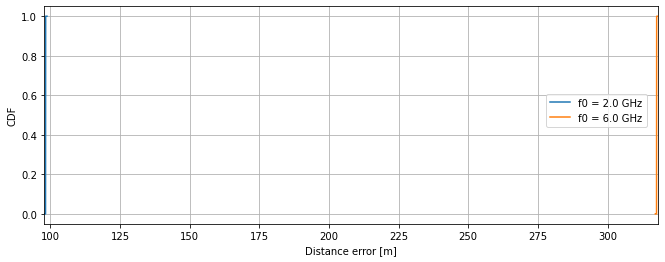

In [25]:
#Plot error CDF (m) for ranging carrier frequencies
mc = 1 #Monte Carlo realizations
p_db = 30#dB
n_f = 16
n_ue = 1
# N_f = np.round(np.linspace(1,60,7))
# N_f = np.round(np.logspace(1,np.log2(60),8,base=2))*1e9
N_f = np.round(np.logspace(1,np.log2(6),2,base=2))*1e9
cdf_erro=[]; pdf_erro=[]; bins=[];
# erro_D = np.zeros([mc,n_bs])
erro_r = np.zeros([mc,n_ue])

for f0 in N_f:
    f = f0 + Δf*(np.arange(n_f)-n_f/2) #Hz
    print('f0={}GHz'.format(f0*1e-9))
    #Compute CDF
    for j in range(mc):
#         np.random.seed(j)
        UE = usuário(n_ue, 200, 100)
#         erro_D[j] = erro_distancia(BS,UE,f,Δf,p_db)
        erro_r[j] = erro_trilat(BS,UE,f,Δf,p_db)
#     erro_Dtot = erro_D.reshape([n_bs*mc])
    erro_rtot = erro_r.reshape([n_ue*mc])
    cdf_erroi, pdf_erroi, binsi = cdf(erro_rtot,bins=21)
    cdf_erro = np.concatenate([cdf_erro,cdf_erroi])
    pdf_erro = np.concatenate([pdf_erro,pdf_erroi])
    bins = np.concatenate([bins,binsi])
cdf_erro = cdf_erro.reshape([len(N_f),np.size(cdf_erroi)])
pdf_erro = pdf_erro.reshape([(len(N_f)),np.size(pdf_erroi)])
bins = bins.reshape([(len(N_f)),np.size(binsi)])
#PLOTs
plt.figure(figsize=(11,4))
for f0,i in zip(N_f*1e-9,range(len(N_f))):
    label = ('f0 = {} GHz'.format(np.round(f0))) 
    plt.plot(bins[i,1:],cdf_erro[i], label=label)
plt.ylabel("CDF")
plt.xlabel("Distance error [m]")
plt.xlim(np.min(bins),np.max(bins))
plt.legend(bbox_to_anchor=(0.81, 0.62), loc='upper left')
plt.grid()

In [ ]:
#Plot error CDF (m) for ranging carrier frequencies
mc = 10 #Monte Carlo realizations
p_db = 30#dB
n_f = 16
# N_f = np.round(np.linspace(1,60,7))
N_f = np.round(np.logspace(1,np.log2(60),8,base=2))*1e9
cdf_erro=[]; pdf_erro=[]; bins=[];
erro_D = np.zeros([mc,n_bs])

for f0 in N_f:
    f = f0 + Δf*(np.arange(n_f)-n_f/2) #Hz
    #Compute CDF
    for j in range(mc):
        np.random.seed(j)
        UE = usuário(n_ue, 200, 100)
        erro_D[j] = erro_distancia(BS,UE,f,Δf,p_db)
    erro_Dtot = erro_D.reshape([n_bs*mc])
    cdf_erroi, pdf_erroi, binsi = cdf(erro_Dtot,bins=21)
    cdf_erro = np.concatenate([cdf_erro,cdf_erroi])
    pdf_erro = np.concatenate([pdf_erro,pdf_erroi])
    bins = np.concatenate([bins,binsi])
cdf_erro = cdf_erro.reshape([len(N_f),np.size(cdf_erroi)])
pdf_erro = pdf_erro.reshape([(len(N_f)),np.size(pdf_erroi)])
bins = bins.reshape([(len(N_f)),np.size(binsi)])
#PLOTs
plt.figure(figsize=(11,4))
for f0,i in zip(N_f*1e-9,range(len(N_f))):
    label = ('f0 = {} GHz'.format(np.round(f0))) 
    plt.plot(bins[i,1:],cdf_erro[i], label=label)
plt.ylabel("CDF")
plt.xlabel("Distance error [m]")
# plt.xlim(np.min(bins),np.max(bins))
plt.xlim(np.min(bins),80)
plt.legend(bbox_to_anchor=(0.81, 0.62), loc='upper left')
plt.grid()

In [27]:
# from scipy.io import savemat,loadmat

mc = 300
p_db = 30#dBm
ruido_dbm = -127#dBm
n_ue = 1
#Carrier frequency
f0 = 5.8e9 #Hz
#User band
Δf = 120e3 #Hz
#Numero de portadoras (OFDM)
# n_f = 600
N_f = 20*np.array([12,22,32,48]); nSC = len(N_f)
#Spectral density of noise
N_bs = 4 #No of nearest BSs for computing distances on multilateration
gap_bs = 10 #[m] Espaçamento entre cada BS 
MT_height = 1;

#Lados da area de bases (quadrado com bases a cada gap_bs metros)
BS,n_bs = bases(gap_bs, 40, 20,3)
UE = np.zeros([mc,n_ue,3])
perc90l = np.zeros(nSC); perc90n = np.zeros(nSC);#90 percentiles
#CDF values for plotting
cdf_errol=np.zeros([nSC,Nbins]); pdf_errol=np.zeros_like(cdf_errol); binsl=np.zeros([nSC,Nbins+1])
cdf_erron=np.zeros_like(cdf_errol); pdf_erron=np.zeros_like(cdf_errol); binsn=np.zeros_like(binsl);
c = 3e8

for i,n_f in enumerate(N_f):
    λmin = c/(f0+Δf*n_f/2)
    d = λmin/2
    #Generating UEs for each MC realization
    for l in range(mc):
        np.random.seed(l)
        UE[l] = usuário(n_ue, 40, 10,z_med=MT_height)
    par = {'fc':f0, 'nSubcarr':n_f, 'freqSubcarr':Δf,'BS':BS, 'UE':UE, 'array':{'d':d,'Mtx':Mtx,'Ntx':Ntx,'Mrx':Mrx,'Nrx':Nrx}}
    savemat("./models/mc/parameters.mat",par)
    # !!! It works only for Windows.
    #For another OS, you must run the script manually ('.\scripts\genChannelModel_mc.m')
    ! .\octave_windows\mingw64\bin\octave-cli .\scripts\genChannelModel_mc.m
    H_mc,delay_real = loadChannel(mc,par,n_ue,path='./models/mc/')
    P = inv_dbm(p_db)/n_f
    erro_range_mc = np.zeros([mc])
    r_estl_mc = np.zeros([mc,n_ue,2],dtype='float64'); r_estn_mc = np.zeros([mc,n_ue,2],dtype='float64')
    D_est_mc = np.zeros([mc,n_ue,n_bs],dtype='float64')
    for l in range(mc):
        UE_l = UE[l]
        H = H_mc[l]
        np.random.seed(l)      
        r_l,r_n,D_est,D = calcDist(H,delay_real,n_bs,n_ue,n_rx,n_f,P,Δf,ruido_dbm,N_bs=N_bs,NLS=True)
        #Erro de distancia BS_UEest (metros)
        erro_D = np.abs(D-D_est)
        #Erro de raio UEest_real (metros)        
        r_estl_mc[l] = r_l; r_estn_mc[l] = r_n
    print('No subcarriers - {} done'.format(n_f))
    cdf_errol[i],pdf_errol[i],binsl[i],perc90l[i] = cdf_erro(r_estl_mc,UE)
    cdf_erron[i],pdf_erron[i],binsn[i],perc90n[i] = cdf_erro(r_estn_mc,UE)
    
#PLOTs
#LLS
print('LLS\n 90-percentile for {} subcarriers, respectively:'.format(N_f)); print('{}m'.format(perc90l))
plt.figure(figsize=(11,4))
for i,n_f in enumerate(N_f):
    label = ('{} subcarriers'.format(n_f)) 
    plt.plot(binsl[i,1:],cdf_errol[i], label=label)
plt.ylabel("CDF"); plt.xlabel("Distance error [m]"); plt.yticks([0.2,0.37,0.55,0.75,0.9])
plt.xlim(np.min(binsl),np.min([np.max(binsl),40]))
plt.legend(bbox_to_anchor=(0.81, 0.75), loc='upper left')
plt.title('LLS w/ {} antenna'.format(n_rx)); plt.grid(linestyle='--')
#NLS
print('NLS\n 90-percentile for {} subcarriers, respectively:'.format(N_f)); print('{}m'.format(perc90n))
plt.figure(figsize=(11,4))
for i,n_f in enumerate(N_f):
    label = ('{} subcarriers'.format(n_f)) 
    plt.plot(binsn[i,1:],cdf_erron[i], label=label)
plt.ylabel("CDF"); plt.xlabel("Distance error [m]")
plt.yticks([0.2,0.37,0.55,0.75,0.9]); plt.xlim(np.min(binsn),np.min([np.max(binsn),40]))
plt.legend(bbox_to_anchor=(0.81, 0.75), loc='upper left')
plt.title('NLS w/ {} antenna'.format(n_rx)); plt.grid(linestyle='--')

NameError: name 'Nbins' is not defined

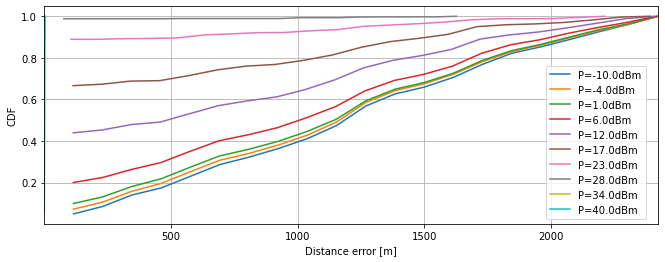

In [28]:
#Plot error CDF (m) for a set of strengths (P_db)
mc = 125 #Monte Carlo realizations
f0 = 5e9 #Hz
n_f = 512
f = f0 + Δf*(np.arange(n_f)-n_f/2)
nPot = 10
P_db = np.linspace(-10,40,nPot) #dB
cdf_erro=[]; pdf_erro=[]; bins=[];

for p_db,i in zip(P_db,range(nPot)):
    erro_D = np.zeros([mc,n_bs])

    #Compute CDF
    for j in range(mc):
        np.random.seed(j)
        UE = usuário(n_ue, 200, 100)
        erro_D[j] = erro_distancia(BS,UE,f,Δf,p_db)
    erro_Dtot = erro_D.reshape([n_bs*mc])
    cdf_erroi, pdf_erroi, binsi = cdf(erro_Dtot,bins=21)
    cdf_erro = np.concatenate([cdf_erro,cdf_erroi])
    pdf_erro = np.concatenate([pdf_erro,pdf_erroi])
    bins = np.concatenate([bins,binsi])
cdf_erro = cdf_erro.reshape([nPot,np.size(cdf_erroi)])
pdf_erro = pdf_erro.reshape([nPot,np.size(pdf_erroi)])
bins = bins.reshape([nPot,np.size(binsi)])
#PLOTs
plt.figure(figsize=(11,4))
for p_db,i in zip(P_db,range(nPot)):
    label = ('P={}dBm'.format(np.trunc(p_db))) 
    plt.plot(bins[i,1:],cdf_erro[i], label=label)
plt.ylabel("CDF")
plt.xlabel("Distance error [m]")
plt.xlim(np.min(bins),np.max(bins))
plt.legend(bbox_to_anchor=(0.81, 0.75), loc='upper left')
plt.grid()

In [ ]:
#Plot error CDF (m) for a set of number of frequencies
mc = 200 #Monte Carlo realizations
f0=60e9
p_db = 30#dB
N_f = 2**np.arange(5,11)
cdf_erro=[]; pdf_erro=[]; bins=[];
erro_D = np.zeros([mc,n_bs])

for n_f in N_f:
    f = f0 + Δf*(np.arange(n_f)-n_f/2) #Hz
    #Compute CDF
    for j in range(mc):
        np.random.seed(j)
        UE = usuário(n_ue, 200, 100)
        erro_D[j] = erro_distancia(BS,UE,f,Δf,p_db)
    erro_Dtot = erro_D.reshape([n_bs*mc])
    cdf_erroi, pdf_erroi, binsi = cdf(erro_Dtot,bins=21)
    cdf_erro = np.concatenate([cdf_erro,cdf_erroi])
    pdf_erro = np.concatenate([pdf_erro,pdf_erroi])
    bins = np.concatenate([bins,binsi])
cdf_erro = cdf_erro.reshape([len(N_f),np.size(cdf_erroi)])
pdf_erro = pdf_erro.reshape([(len(N_f)),np.size(pdf_erroi)])
bins = bins.reshape([(len(N_f)),np.size(binsi)])
#PLOTs
plt.figure(figsize=(11,4))
for n_f,i in zip(N_f,range(len(N_f))):
    label = ('{} carriers'.format(n_f)) 
    plt.plot(bins[i,1:],cdf_erro[i], label=label)
plt.ylabel("CDF")
plt.xlabel("Distance error [m]")
plt.xlim(np.min(bins),np.max(bins))
plt.legend(bbox_to_anchor=(0.81, 0.62), loc='upper left')
plt.grid()

#### Simular 1 BS em 30dBm variando distancia do UE (a cada 10 ate 100m) (circular) (512 carriers)
Consertar fases do canal (1 para cada BS)

In [65]:
def usuárioR(n, R):
    z_med = 1.5 #m
    UE = np.array([])
    for i in range(n):
        φ = 2*np.pi*(np.random.rand()-0.5)
        UE = np.append(UE,np.array([R*np.cos(φ),R*np.sin(φ),z_med]))
    return UE.reshape(n,3)

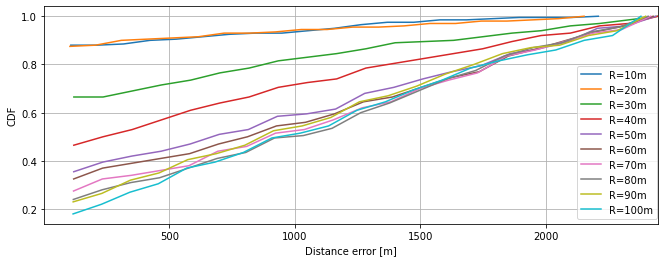

In [68]:
#Plot error CDF (m) for a set of R
mc = 200 #Monte Carlo realizations
z_bs=15
BS = np.array([[0,0,z_bs]]); n_bs = np.size(BS,axis=0)
n_f = 512
f = f0 + Δf*(np.arange(n_f)-n_f/2)
p_db = 30 #dBm
# nPot = 10
# P_db = np.linspace(-10,40,nPot) #dB
n_r = 10
R = np.linspace(10,100,n_r)
cdf_erro=[]; pdf_erro=[]; bins=[];

for r,i in zip(R,range(n_r)):
    erro_D = np.zeros([mc,n_bs])

    #Compute CDF
    for j in range(mc):
        np.random.seed(j)
        UE = usuárioR(n_ue, r)
        erro_D[j] = erro_distancia(BS,UE,f,Δf,p_db)
    erro_Dtot = erro_D.reshape([n_bs*mc])
    cdf_erroi, pdf_erroi, binsi = cdf(erro_Dtot,bins=21)
    cdf_erro = np.concatenate([cdf_erro,cdf_erroi])
    pdf_erro = np.concatenate([pdf_erro,pdf_erroi])
    bins = np.concatenate([bins,binsi])
cdf_erro = cdf_erro.reshape([n_r,np.size(cdf_erroi)])
pdf_erro = pdf_erro.reshape([n_r,np.size(pdf_erroi)])
bins = bins.reshape([n_r,np.size(binsi)])
#PLOTs
plt.figure(figsize=(11,4))
for r,i in zip(R,range(n_r)):
    label = ('R={}m'.format(round(r))) 
    plt.plot(bins[i,1:],cdf_erro[i], label=label)
plt.ylabel("CDF")
plt.xlabel("Distance error [m]")
plt.xlim(np.min(bins),np.max(bins))
plt.legend(bbox_to_anchor=(0.86, 0.75), loc='upper left')
plt.grid()